In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 可显示多行结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
pd.__version__
np.__version__

'0.24.2'

'1.16.2'

# 一、设置画布和坐标系

#### 准备画布，添加坐标系

In [4]:
fig=plt.figure(figsize=(12,6))
type(fig)

matplotlib.figure.Figure

<Figure size 864x432 with 0 Axes>

In [5]:
# 关闭坐标轴
# plt.axis('off')

In [6]:
fig.add_subplot(1,2,1)

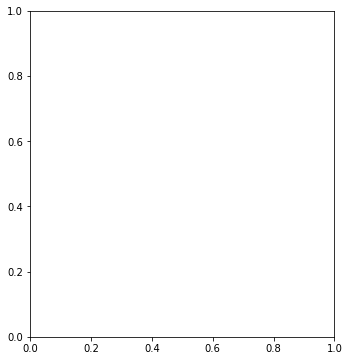

In [7]:
# 一个坐标系
ax=fig.add_subplot(1, 2, 1)  #添加子坐标系
ax.figure #图形的显示
# 一行两列 ax是第一个坐标系

图形的显示

In [8]:
# ax.figure 
# plt.figure

In [9]:
fig.add_subplot?

Signature: fig.add_subplot(*args, **kwargs)
Docstring:
Add an `~.axes.Axes` to the figure as part of a subplot arrangement.

Call signatures::

   add_subplot(nrows, ncols, index, **kwargs)
   add_subplot(pos, **kwargs)
   add_subplot(ax)

Parameters
----------
*args
    Either a 3-digit integer or three separate integers
    describing the position of the subplot. If the three
    integers are *nrows*, *ncols*, and *index* in order, the
    subplot will take the *index* position on a grid with *nrows*
    rows and *ncols* columns. *index* starts at 1 in the upper left
    corner and increases to the right.

    *pos* is a three digit integer, where the first digit is the
    number of rows, the second the number of columns, and the third
    the index of the subplot. i.e. fig.add_subplot(235) is the same as
    fig.add_subplot(2, 3, 5). Note that all integers must be less than
    10 for this form to work.

projection : {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rect

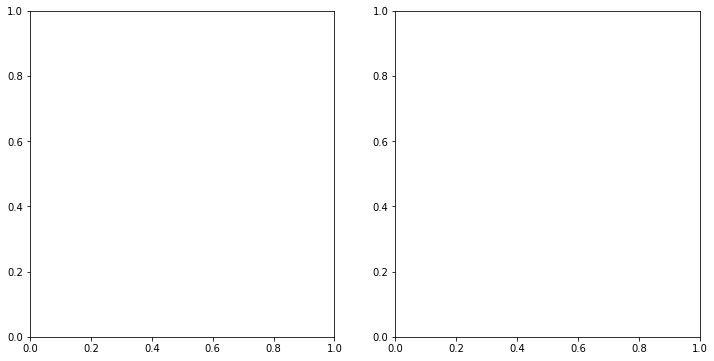

In [10]:
# 一行两个坐标系
ax=fig.add_subplot(1,2,2)
ax.figure #显示画布

#### 直接生成画布及坐标系

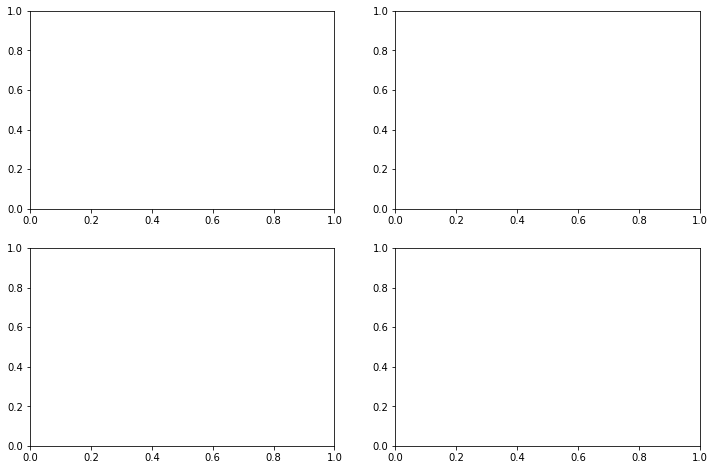

In [11]:
# 直接生成2行2列的画布和坐标系
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,8))

In [12]:
axes[0,0]

# 二、解决中文乱码的问题

In [13]:
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

In [14]:
df=pd.DataFrame(np.random.rand(50,2),columns=list('ab'))

In [15]:
df.head()

,a,b
0,0.561748,0.444673
1,0.271590,0.821885
2,0.405821,0.801928
3,0.068689,0.538119
4,0.449252,0.667740


# 三、一个坐标系基本元素的设定

In [16]:
df.head()
df.tail()

,a,b
0,0.561748,0.444673
1,0.271590,0.821885
2,0.405821,0.801928
3,0.068689,0.538119
4,0.449252,0.667740


,a,b
45,0.532084,0.922415
46,0.786240,0.285857
47,0.215735,0.417060
48,0.797897,0.684293
49,0.900960,0.251212


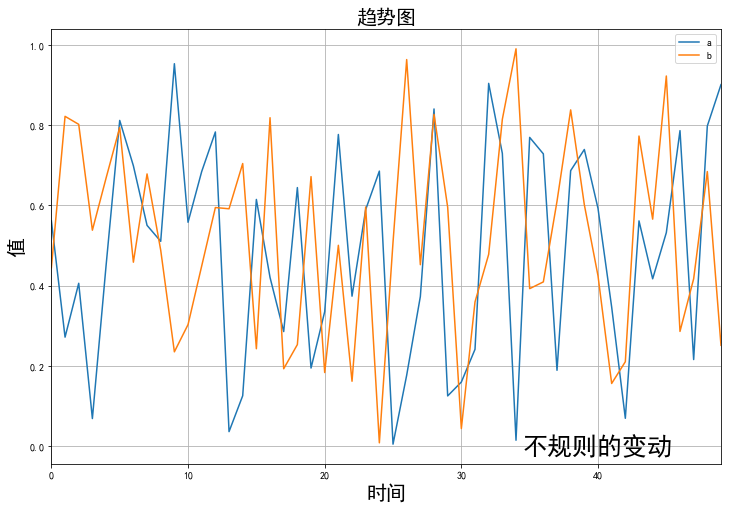

In [17]:
# 准备画布
fig1,ax=plt.subplots(1,1,figsize=(12,8))
df1=pd.DataFrame(np.random.randn(50,2))
df.plot(ax=ax)
# 添加图的标题
ax.set_title('趋势图',fontsize=20)
# x轴标签
ax.set_xlabel('时间',fontsize=20)
# y轴标签 
ax.set_ylabel('值',fontsize=20)
# # x轴边界
# ax.set_xlim([0,10])
# # y轴边界
# ax.set_ylim([0,1])
# # x轴刻度
# # h1=range(0,60,5) #水平
# # ax.set_xticks(h1)
# ax.set_xticks(range(0,10,1))
# # y轴刻度
# # v1=range(-4,4,1)  #垂直
# # ax.set_yticks(v1)
# ax.set_yticks(range(0,10))
# # 设置刻度标签
# # 设置x轴的刻度标签
# ax.set_xticklabels(range(0,10,1),fontdict={'fontsize':25})
# # 设置y轴的刻度标签
# ax.set_yticklabels('%.2f'%i for i in v1) #将y的刻度值保留两位小数
# 设置图例
ax.legend(loc='upper right')
# 设置网格
ax.grid()
# 设置指定位置的文本
ax.text(40,0,'不规则的变动',fontsize=25,
        va='center', #垂直的角度
        ha='center') ;#水平的角度

# 四、图形的绘制

##### 在网上CSDN收集到的python中画图可用的颜色
- https://blog.csdn.net/guoxinian/article/details/80242353

##### 图形绘制的流程
- 1.准备画布、准备数据
- 2.如存在多个坐标系需要指定坐标系
    - 画图时指定坐标系 ax=axes[]
    - 指定坐标系画图  
        - axes[].plot
        - axes[].scatter
        - axes[].hist
        - axes[].bar
        - axes[].pie
        - axes[].kde
        - axes[].area
        - axes[].fill
- 3.添加figure对象标题、各个坐标系的标题、文本注释
- 4.设置坐标轴ax.set_的刻度 ticks、标签刻度ticklabel、边界 lim 
- 5.添加图例ax.legend(loc='')、表格ax.grid()
    - 整体的原则尽量不要遮挡图形

##### 多种绘图的方式
- 直接数据框进行plot绘图
    - df.plot() 含有title参数
- 绘图时指定坐标系
    - df.plot(ax=axes[]) 含有title参数
- 指定坐标系绘图  在坐标轴张设置title
    - axes[].plot(df)
    - axes[].scatter(df)
    - axes[].bar(df)
    - axes[].barh(df)
    - 等等

### 4.1、线图 
- plot()
- plot.line()
- plot(kind='line')

单条线

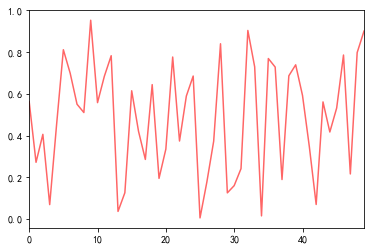

In [18]:
# 直接数据进行plot绘图
df['a'].plot(color='red',linestyle='-',alpha=0.6);

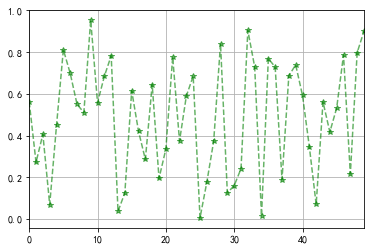

In [19]:
df['a'].plot.line(color='green',
                  linestyle='--',
                  marker='*',
                  alpha=0.6,grid=True);

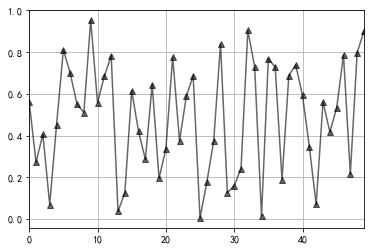

In [20]:
df['a'].plot(kind='line',color='k',linestyle='-',
             marker='^',alpha=0.6,grid=True);

双线

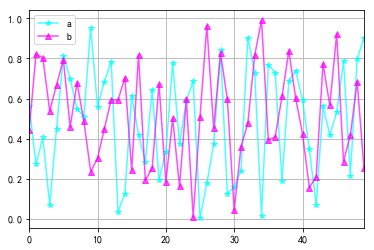

In [21]:
df.plot(colormap='cool',style=['*-','^-'],alpha=0.7,grid=True,
        layout='right');
# []按顺序指定的线的类型和特殊标志
# {}利用字典的键值对的一一对应的特性，指定对应的线性和标志

### 4.2、条形图 柱状图
- plot.bar()
- plot(kind='bar')

In [22]:
df3=pd.DataFrame(np.random.randint(0,20,5))

In [23]:
df

,a,b
0,0.561748,0.444673
1,0.271590,0.821885
2,0.405821,0.801928
3,0.068689,0.538119
4,0.449252,0.667740
5,0.811684,0.793875
6,0.698633,0.458377
7,0.550209,0.678352
8,0.510352,0.488337
9,0.953054,0.234973


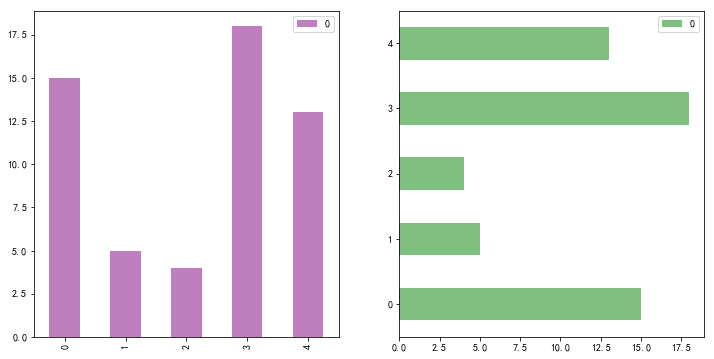

In [24]:
# 绘图时指定坐标系
fig2,axes=plt.subplots(1,2,figsize=(12,6))
# 纵向的柱状图
df3.plot.bar(color='purple',alpha=0.5,ax=axes[0])
# 横向条形图 barh
df3.plot.barh(color='green',alpha=0.5,ax=axes[1]);

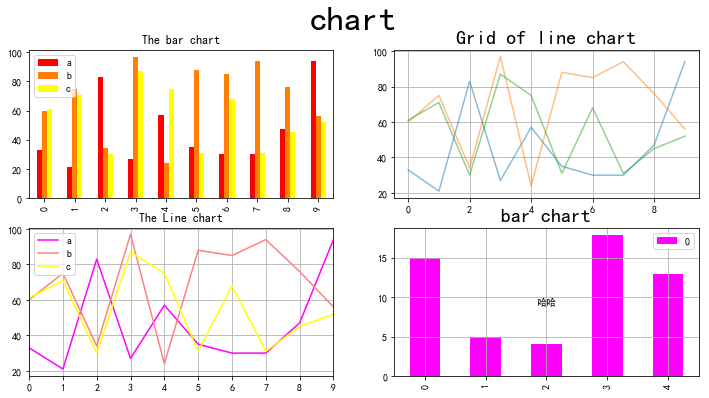

In [25]:
fig2,axes=plt.subplots(2,2,figsize=(12,6))
df2=pd.DataFrame(np.random.randint(20,100,(10,3)),columns=list('abc'))
# 画图时指定坐标系
df2.plot.bar(colormap='autumn',title='The bar chart',ax=axes[0,0])
# 指定坐标系上画图
axes[0,1].plot(df2,alpha=0.5)
# 不能直接在里面设置grid这个参数，但可以在坐标轴后设置网格参数
axes[0,1].grid()
df2.plot(colormap='spring',title='The Line chart',grid=True,ax=axes[1,0])
df3.plot.bar(colormap='spring',ax=axes[1,1])

# 设置大的标题
fig2.suptitle('chart',fontsize=35)
# 设置个坐标轴的标题
axes[0,1].set_title('Grid of line chart',fontsize=20)
axes[1,1].set_title('bar chart',fontsize=20)
axes[1,1].grid()
axes[1,1].text(2,10,'哈哈',ha='center',va='top');

- 堆积柱状图
- 正反堆积柱状图

In [26]:
df2.head()

,a,b,c
0,33,60,61
1,21,75,71
2,83,34,30
3,27,97,87
4,57,24,75


Text(0, 33, '33.00')

Text(1, 21, '21.00')

Text(2, 83, '83.00')

Text(3, 27, '27.00')

Text(4, 57, '57.00')

Text(5, 35, '35.00')

Text(6, 30, '30.00')

Text(7, 30, '30.00')

Text(8, 47, '47.00')

Text(9, 94, '94.00')

Text(0, -60, '-60.00')

Text(1, -75, '-75.00')

Text(2, -34, '-34.00')

Text(3, -97, '-97.00')

Text(4, -24, '-24.00')

Text(5, -88, '-88.00')

Text(6, -85, '-85.00')

Text(7, -94, '-94.00')

Text(8, -76, '-76.00')

Text(9, -56, '-56.00')

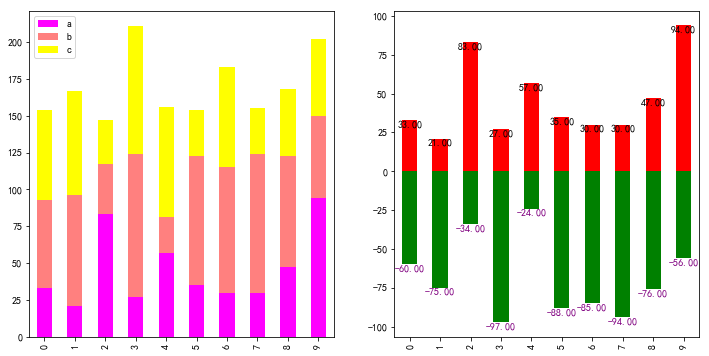

In [27]:
fig3,axes=plt.subplots(1,2,figsize=(12,6))
df2.plot.bar(colormap='spring',stacked=True,ax=axes[0])
# 反向的柱状图
df2['a'].plot.bar(ax=axes[1],color='r')
df2['d']=-df2['b']
df2['d'].plot.bar(ax=axes[1],color='g')
# 在图像上添加数值
#i为df2.index j为df2['a']的数值
for i,j in zip(df2.index,df2['a'].values): 
    axes[1].text(i,j,'%.2f'%j,color='k',va='top',ha='center')
for i,j in zip(df2.index,df2['b'].values):
    axes[1].text(i,-j,'%.2f'% -j,color='purple',va='top',ha='center');

### 4.3、面积图 area
- stacked 默认为False 全部列为正或负才能够设定True

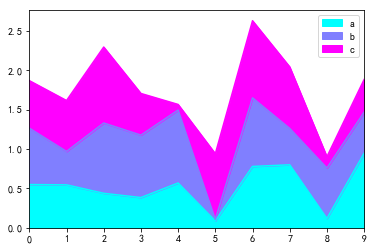

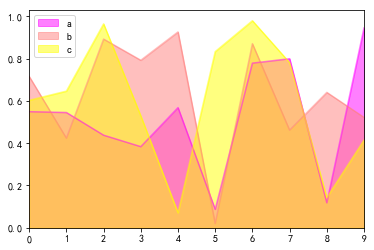

In [28]:
# 设定随机种子使图形的形状稳定下来
np.random.seed(0)
df4=pd.DataFrame(np.random.rand(10,3),columns=list('abc'))
# 粗略的直接画图未准备画布，好的习惯是画图先准备画布
df4.plot.area(stacked=True,colormap='cool')
np.random.seed(1)
df4.plot.area(stacked=False,colormap='spring');

### 4.4、填图 fill

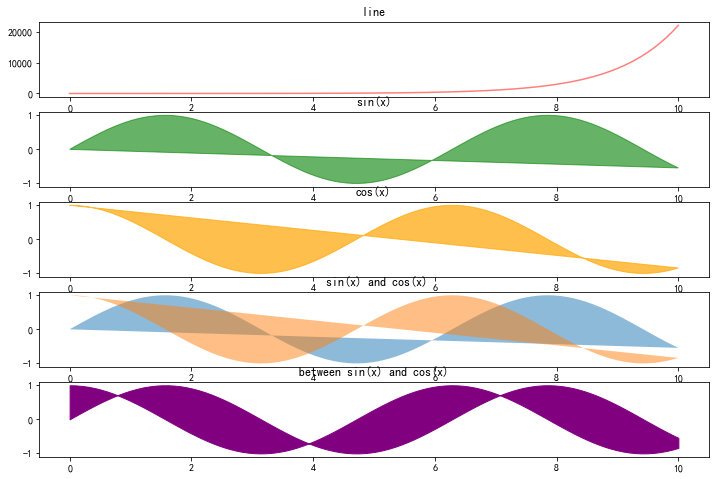

In [29]:
fig5,axes=plt.subplots(5,1,figsize=(12,8))
x=np.linspace(0,10,100) #0-10的区间被均分成100份
y1=np.exp(x)
y2=np.sin(x)
y3=np.cos(x)
# 先 x后y 
axes[0].plot(x,y1,color='r',alpha=0.5)
axes[1].fill(x,y2,color='g',alpha=0.6)
axes[2].fill(x,y3,color='orange',alpha=0.7)
axes[3].fill(x,y2,x,y3,alpha=0.5)
axes[4].fill_between(x,y2,y3,color='purple')
# 设置各图形的坐标系
axes[0].set_title('line')
axes[1].set_title('sin(x)')
axes[2].set_title('cos(x)')
axes[3].set_title(' sin(x) and cos(x)')
axes[4].set_title('between sin(x) and cos(x)');

### 4.5、饼图 pie

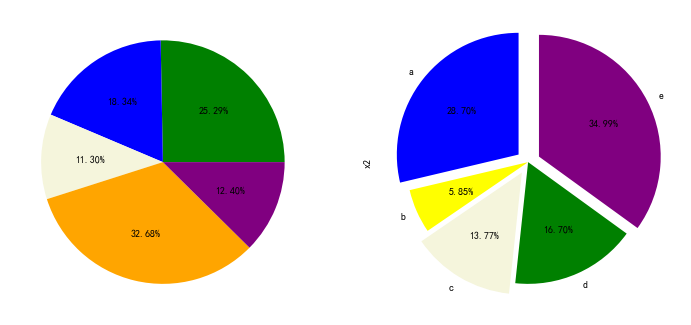

In [30]:
fig5,axes=plt.subplots(1,2,figsize=(12,8))
df5=pd.DataFrame(np.random.rand(5,3),columns=['x1','x2','x3'],index=list('abcde'))
axes[0].pie(df5['x1'],colors=['green','blue','beige','orange','purple'],autopct='%.2f%%')
df5['x2'].plot.pie(ax=axes[1],explode=[0.1,0,0.1,0,0.1]
                   ,colors=['blue','yellow','beige','green','purple'],
                  radius=1,
                   startangle=90,
                   autopct='%.2f%%'); # %% 显示百分号
# beige 米色

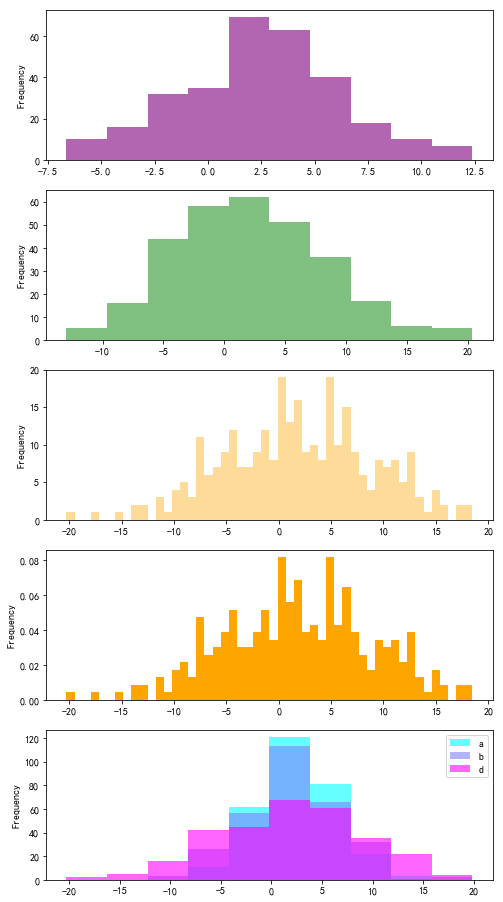

In [31]:
fig6,axes=plt.subplots(5,1,figsize=(8,16))
# 直接在指定各列名上生成数值
df6=pd.DataFrame({'a':np.random.normal(2,4,300),
                  'b':np.random.normal(2,5,300),
                  'c':np.random.normal(2,6,300),
                  'd':np.random.normal(2,7,300)})
df6['a'].plot.hist(color='purple',alpha=0.6,ax=axes[0])
df6['c'].plot.hist(color='green',alpha=0.5,ax=axes[1])
df6['d'].plot.hist(color='orange',alpha=0.4,ax=axes[2],
                   bins=50,histtype='bar')
df6['d'].plot.hist(color='orange',bins=50,histtype='bar',
                   density=True, #可以使颜色加深
                   ax=axes[3])
df6[['a','b','d']].plot.hist(colormap='cool',
                             alpha=0.6,ax=axes[4]);

- ### 4.6***添加和密度图    kde***

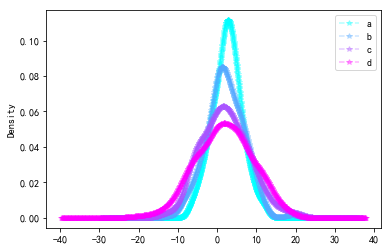

In [32]:
# 直接画图
df6.plot.kde(colormap='cool',alpha=0.3,style='*--')

- ## ***分组画直方图   df6.hist(by参数)***
- 不能够直接加图例
- 

In [33]:
df7=pd.read_excel(r'C:\Users\Administrator\Desktop\六年级学生成绩表.xls')
df7.head()

,姓名,性别,学校,语文,数学,英语,品德,科学,总分
0,蔡左河,男,第11小学,53.0,28.0,32.0,4.0,1.0,118.0
1,王小名,女,第11小学,77.5,87.0,67.5,8.0,8.0,248.0
2,张三湖,男,第1小学,95.0,99.0,80.0,10.0,10.0,294.0
3,李小红,女,第1小学,98.0,97.0,79.0,10.0,9.5,293.5
4,张南名,女,第1小学,94.0,97.0,80.0,10.0,10.0,291.0


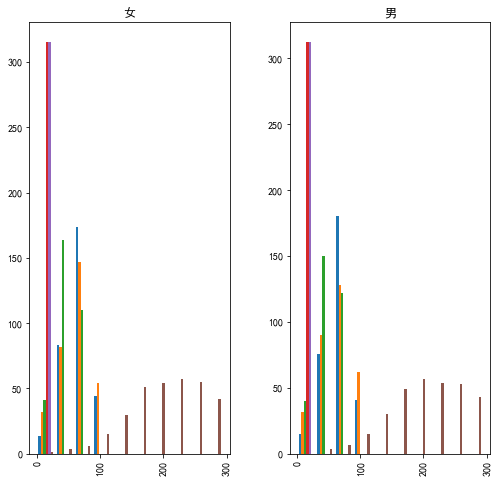

In [34]:
axes=df7.hist(column=['语文','数学','英语'],by=df7['性别'],
         figsize=(8,8));
# 注意不能够在上面直接设置图例

### 4.7散点图 scatter

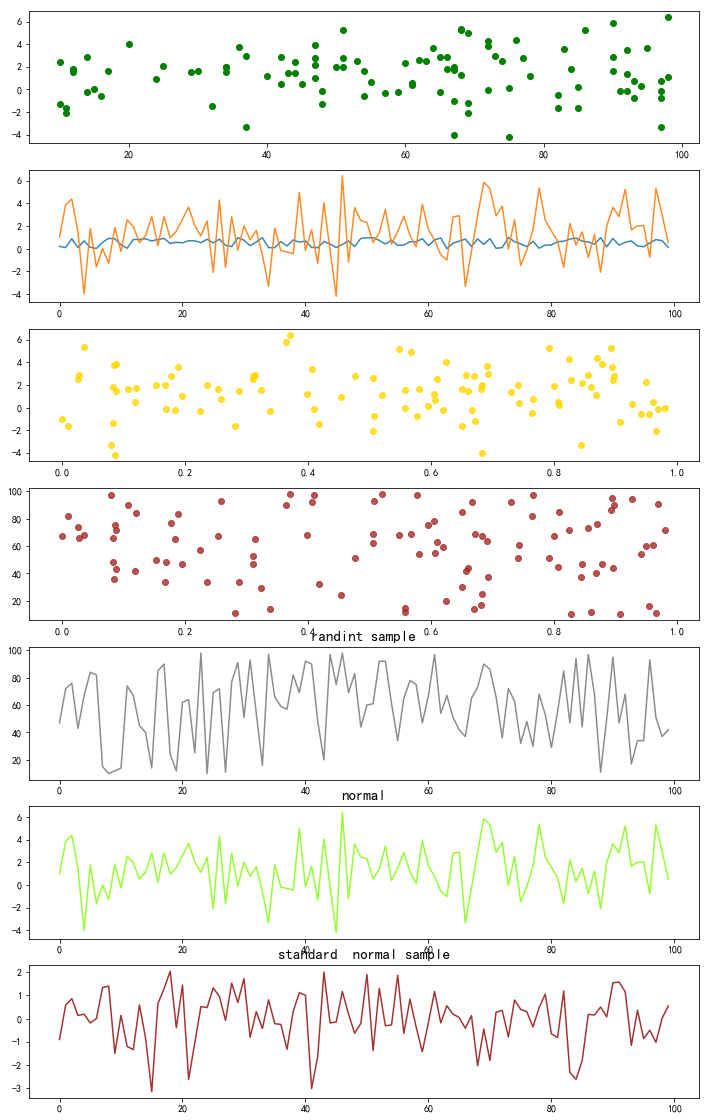

In [35]:
fig7,axes=plt.subplots(7,1,figsize=(12,20)) #宽度、高度
df8=pd.DataFrame({'d':np.random.rand(100), #0-1的均匀均匀分布中抽取样本
                 'e':np.random.randint(10,100,100),#指定范围内抽取整数的值
                 'f':np.random.normal(1,2,100), #指定的均值、标准差的正态分布中抽取样本
                 'g':np.random.randn(100)})  #标准正态分布中抽取样本
axes[0].scatter(df8['e'],df8['f'],color='g')
axes[1].plot(df8.loc[:,['d','f']],alpha=0.9)
axes[2].scatter(df8['d'],df8['f'],color='gold',alpha=0.8) #gold 金黄色
axes[3].scatter(df8['d'],df8['e'],color='brown',alpha=0.8) #brown 棕色
axes[4].plot(df8['e'],color='gray',alpha=0.9) #gray黄色
axes[4].set_title('randint sample',fontsize=15)
axes[5].plot(df8['f'],color='lawngreen',alpha=0.8)
axes[5].set_title('normal',fontsize=15)
axes[6].plot(df8['g'],color='darkred',alpha=0.8)
axes[6].set_title('standard  normal sample',fontsize=15);

### 设置颜色条 colorbar

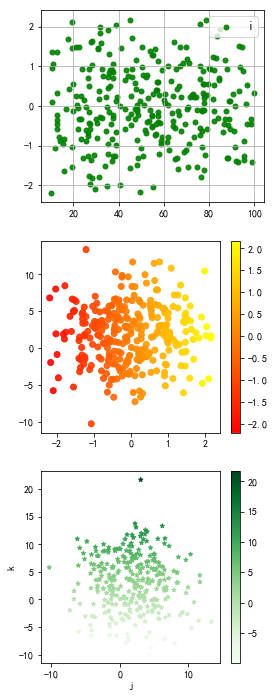

In [36]:
fig8,axes=plt.subplots(3,1,figsize=(4,12))
# 传入数据
df9=pd.DataFrame({'h':np.random.uniform(10,100,300),
                 'i':np.random.randn(300),
                 'j':np.random.normal(2,4,300),
                 'k':np.random.normal(3,5,300)})
# 坐标系上生成散点图
axes[0].scatter(df9['h'],df9['i'],color='green',s=25 #散点的大小
                ,alpha=0.9)
axes[0].grid()
# 添加图例
axes[0].legend(loc='upper right',fontsize=12)
#设置颜色条的两种方式
## 方式一
# 在坐标轴上画图时，不能设置colorbar这个参数
# 需要单独进行设置
temp=axes[1].scatter(df9['i'],df9['j'],c=df9['i'], #df9['i']的值越大，颜色越深
                     cmap='autumn',alpha=0.9)
fig.colorbar(temp,ax=axes[1])  #注意此处需要设置ax=axes[1]
## 方式二 直接画图时设置colobar参数和ax参数
df9.plot.scatter(x='j',y='k',
                 c=df9['k'],cmap='Greens', #Green表示绿色的系列
                 marker='*',
                 ax=axes[2],colorbar=True);

In [37]:
# 查看帮助了解用法及参数
# help(axes[0].scatter)
# help(df9.plot.scatter)

### ***散点图矩阵***

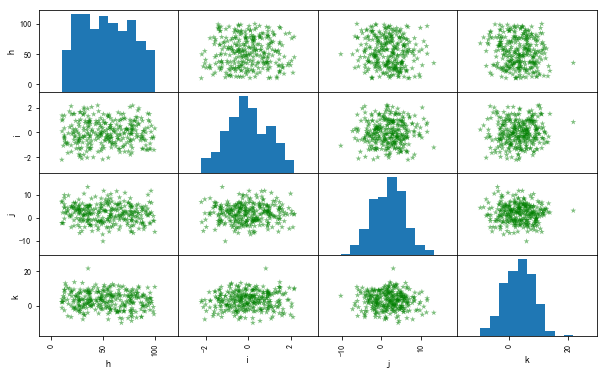

In [38]:
pd.plotting.scatter_matrix(df9,figsize=(10,6),
                           marker='*', #散点的形状
                           diagonal='hist', #对角线的形状 显示了个变量的分布状态
                           range_padding=0.5,color='g',
                           alpha=0.5);

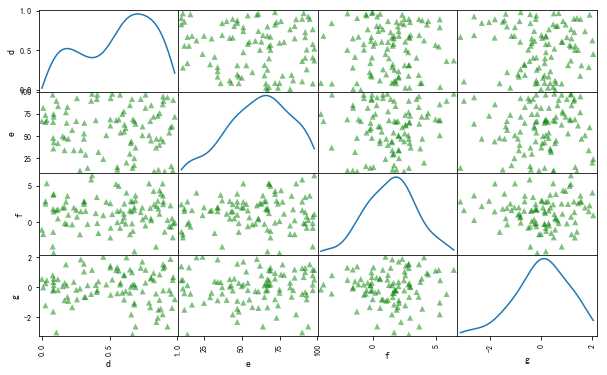

In [39]:
pd.plotting.scatter_matrix(df8,alpha=0.5,figsize=(10,6),
                           marker='^',diagonal='kde', #核密度图
                           color='green');

In [40]:
# help(pd.plotting.scatter_matrix)

### 4.8 箱线图 盒须图 盒状图 
- #### df.plot.box
    - help(df.plot.box)
- #### df.boxplot
    - help(df.plot.boxplot) 
- 图形中包含的数据
    - min
    - 上四分位数 Q1
    - 中位数    medim
    - 下四分位数 Q3 也即四分之三分位数
    - 上下边界Q3+1.5IQR和Q1-1.5IQR （IQR=Q3-Q1）
    - max
    - 异常值 ：上下边界以外的值

In [41]:
# help(df9.plot.box)
# plt.plot.box()绘制
# color → 箱型图着色
# boxes → 箱子
# medians → 中位数线
# whiskers → 分位数与error bar横线之间竖线（胡须）
# caps → 在胡须末端的水平线,cap帽子的意思。
# vert：是否竖着的箱线图，默认True
# position：箱型图占位
#ylim:设定值轴的区间
#sym：异常点的形状和颜色

''

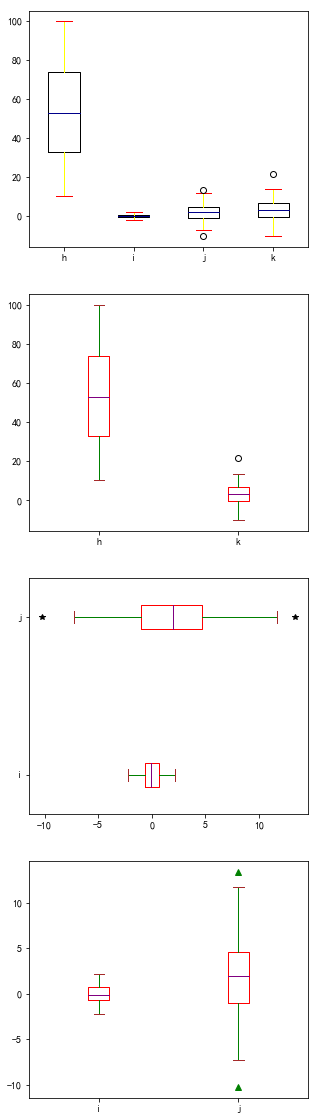

In [42]:
fig10,axes=plt.subplots(4,1,figsize=(5,20))
# 可针对箱子的各个部分进行设定
color1 = dict(boxes='black', #箱子
            whiskers='yellow', 
             medians='DarkBlue', 
             caps='red') #上下边界
# 数据整体的箱线图
df9.plot.box(ax=axes[0],color=color1)
# 部分数据的箱线图
color2=dict(boxes='red',whiskers='green',medians='purple',caps='brown')
df9[['h','k']].plot.box(ax=axes[1],color=color2) #vert=True 默认的箱子是竖着的

df9[["i","j"]].plot.box(vert=False,positions=[1, 3] #箱子的占位 1、3位
                        ,ax = axes[2],
                        color = color2,
                        sym="k*") #异常值的颜色及形状  
df9[['i','j']].plot.box(vert=True,color=color2,
                        ax=axes[3],positions=[1,2],sym='g^');
;

In [43]:
# help(plt.boxplot)
#f是一个字典对象
#f里面的键包括下面几部分，这几部分是构成箱线图的各个元素。

#'boxes','medians','whiskers', 'caps', 'fliers', 'means'
# boxes, 箱线
# medians, 中位值的横线,
# means, 均值的横线,
# whiskers, 从box到error bar之间的竖线.
# caps, error bar的横线
# fliers, 异常值
# f = df.boxplot( sym = 'o', # 异常点形状，参考marker
#                 vert = True, # 是否垂直
#                 whis = 1.5,
#                 # IQR，默认1.5，也可以设置区间比如[5,95]，
#                 #代表强制上下边缘为数据95%和5%位置
#                 patch_artist = True,#填充
#                 meanline = False, # 是否显示均值线
#                 showmeans=True,  #是否显示均值点
#                 showbox = True,  # 是否显示箱子
#                 showcaps = True,  # 是否显示边缘线
#                 showfliers = True,  # 是否显示异常值
#                 notch = False, # 中间箱体是否缺口
#                 return_type='dict' # 返回类型为字典
#                 )

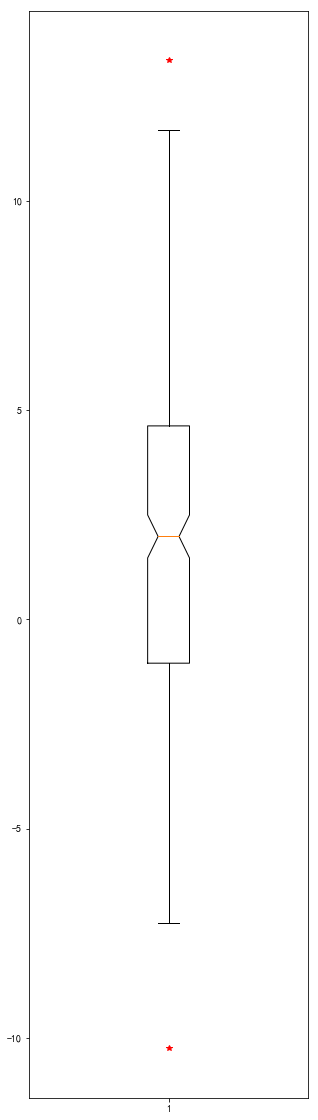

In [44]:
plt.figure(figsize=(5,20))
# 画图
plt.boxplot(df9['j'],
             sym='r*',
             vert=True,
             patch_artist = False, #箱子填充
             meanline=True, #显示均值线
             notch=True, #中间箱体存在缺口
            );

- 绘制分组箱线图
    - 安照某一个字段进行分组绘制箱线图 
    - 按照多个字段进行分组绘制箱线图

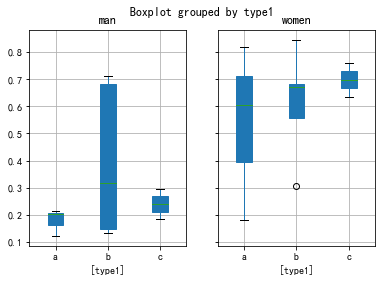

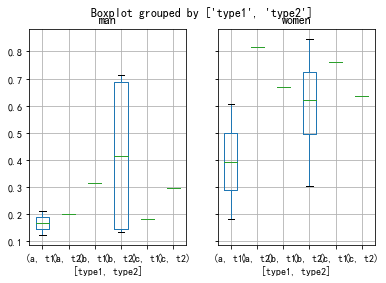

In [45]:
df = pd.DataFrame(np.random.rand(10,2), columns=['man', 'women'] )
df['type1'] = pd.Series(['a','b','a','a','b','b','c','b','c','b'])
df['type2'] = pd.Series(['t1','t2','t1','t2','t1','t2','t2','t2','t1','t2'])
df.boxplot(by = 'type1',patch_artist=True)
df.boxplot(column=['man','women'], by=['type1','type2']);   # 分组汇总

### 4.9 雷达图 

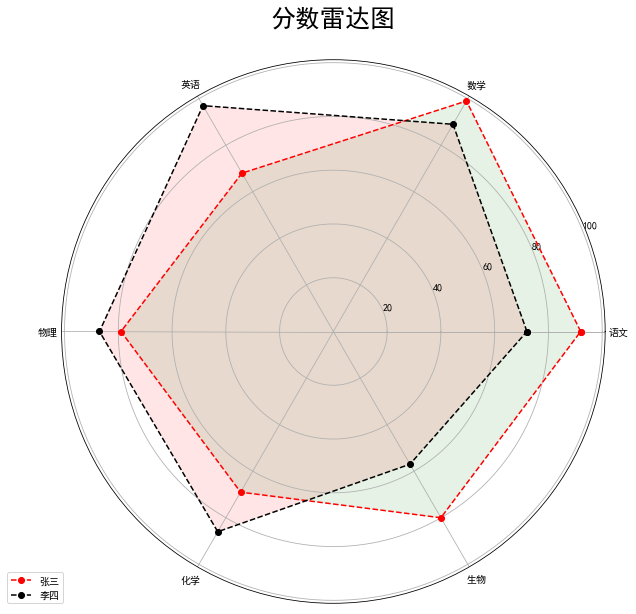

In [46]:
fig12=plt.figure(figsize=(10,10))

ax=fig12.add_subplot(111,polar=True) #polar=True 表示设定为极坐标
# 准备数据
labels=['语文','数学','英语','物理','化学','生物']
zhangsan=np.array([92,99,68,79,69,80])
lisi=np.array([72,89,97,87,86,57])
# 将数据进行闭合操作
#单个的zhangsan[0]结果是一个元素因此需要添加到序列
# 下列的代码时间数据的数据首尾进行来连接
zhangsan=np.concatenate((zhangsan,[zhangsan[0]])) 
lisi=np.concatenate((lisi,[lisi[0]]))

# 准备极坐标
dataLenth = len(labels)
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False) 
# 坐标闭合
angles=np.concatenate((angles,[angles[0]])) #angles [] angles[0] 元素 [angles[0]]

# 在坐标轴上开始画图
ax.plot(angles,zhangsan,'ro--',label='张三')
ax.plot(angles,lisi,'ko--',label='李四')

# 填充颜色
ax.fill(angles,zhangsan,facecolor='g',alpha=0.1)
ax.fill(angles,lisi,facecolor='r',alpha=0.1)

# 将
angles1=angles*180/np.pi
# set_thetagrids方法设定每个特征的标签
# 角度制表示角的度数
ax.set_thetagrids(angles1,labels,fontproperties="SimHei") #设定字体
ax.set_title('分数雷达图',fontsize=25)
ax.grid(True)
ax.legend(loc=(-0.1,0)) #水平的位置，垂直的位置 向右走数值越大，向上轴数值越大

# 将画好的图形进行保存
'''注意如果代码中存在 plt.show()时
    记得务必将plt.savefig()写在其前面，
    否则保存的是一个空白色的图片'''
plt.savefig('a.png'); #默认的是保存在当前的路径下 图片的格式有 jpg、png格式

In [47]:
lisi
zhangsan
angles
# 注意三者的长度必须一致


array([72, 89, 97, 87, 86, 57, 72])

array([92, 99, 68, 79, 69, 80, 92])

array([0.        , 1.04719755, 2.0943951 , 3.14159265, 4.1887902 ,
       5.23598776, 0.        ])

### 图片的保存

In [48]:
# plt.savefig('w.jpg')
# 得到的是空白色的图片
# 此代码要放在所绘制图形的最后一行来执行
# 也可以保存到指定的路径
# 路径的三种形式r'' '\\' '/'

### 扩展的一个小图形

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#np.linspace将-10,10的范围平均划分成1000份
xv=np.linspace(-10,10,1000)
yv=np.linspace(-10,10,1000)
# 
x,y=np.meshgrid(xv,yv)

In [50]:
x
y

array([[-10.        ,  -9.97997998,  -9.95995996, ...,   9.95995996,
          9.97997998,  10.        ],
       [-10.        ,  -9.97997998,  -9.95995996, ...,   9.95995996,
          9.97997998,  10.        ],
       [-10.        ,  -9.97997998,  -9.95995996, ...,   9.95995996,
          9.97997998,  10.        ],
       ...,
       [-10.        ,  -9.97997998,  -9.95995996, ...,   9.95995996,
          9.97997998,  10.        ],
       [-10.        ,  -9.97997998,  -9.95995996, ...,   9.95995996,
          9.97997998,  10.        ],
       [-10.        ,  -9.97997998,  -9.95995996, ...,   9.95995996,
          9.97997998,  10.        ]])

array([[-10.        , -10.        , -10.        , ..., -10.        ,
        -10.        , -10.        ],
       [ -9.97997998,  -9.97997998,  -9.97997998, ...,  -9.97997998,
         -9.97997998,  -9.97997998],
       [ -9.95995996,  -9.95995996,  -9.95995996, ...,  -9.95995996,
         -9.95995996,  -9.95995996],
       ...,
       [  9.95995996,   9.95995996,   9.95995996, ...,   9.95995996,
          9.95995996,   9.95995996],
       [  9.97997998,   9.97997998,   9.97997998, ...,   9.97997998,
          9.97997998,   9.97997998],
       [ 10.        ,  10.        ,  10.        , ...,  10.        ,
         10.        ,  10.        ]])

In [51]:
# 重塑
# x=x.reshape(1000000)
# y=y.reshape(1000000)

# ravel将数据压缩成一行
# 第二行紧接着第一行进行摆放
x=np.ravel(x)
y=np.ravel(y)
x.shape
y.shape

# 上述的两种方式得到的结果是一样的

(1000000,)

(1000000,)

In [52]:
# 选取np.sqrt(X^2+Y^2)<10的地方填充
xc=x[(x**2+y**2)**0.5<=10] #索取出符合条件的数值
yc=y[(x**2+y**2)**0.5<=10]

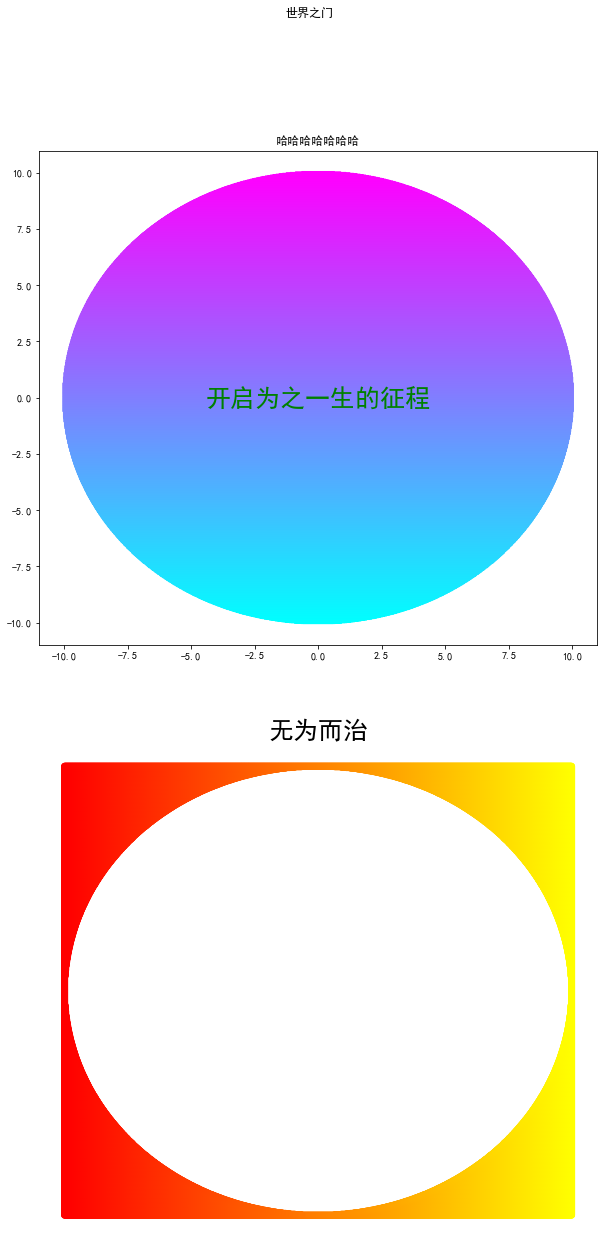

In [53]:
# 准备画布
fig66,axes=plt.subplots(2,1,figsize=(10,20))
axes[0].scatter(xc,yc,s=12,c=yc,marker='*',cmap='cool')
# c一般与cmap一起搭配使用 cmap是调色板，c是依据yc值的大小来显示颜色的深浅
# 类似tableau中作图时的将值添加到颜色上的操作一样
fig66.suptitle('世界之门')
axes[0].set_title('哈哈哈哈哈哈哈')
axes[0].text(0,0,'开启为之一生的征程',fontsize=25,
        color='green',va='center',ha='center')

ac=x[(x**2+y**2)**0.5>10]
bc=y[(x**2+y**2)**0.5>10]

axes[1].scatter(ac,bc,c=ac,cmap='autumn')
axes[1].set_title('无为而治',fontsize=25)
# 关闭坐标轴
plt.axis('off');

## 扩展的知识 np.meshgrid() 函数

In [54]:
x=np.array([[1,2],[3,4]])
y=np.array([[5,6,7],[8,9,10]])
x
x.ndim
y
y.ndim

array([[1, 2],
       [3, 4]])

2

array([[ 5,  6,  7],
       [ 8,  9, 10]])

2

In [55]:
X,Y=np.meshgrid(x,y)
X  # 将元素 1,2,3,4 重复6行 因为y是6个元素
X.ndim
Y #将元素 4；5；6；7；8；9；10 重复4列 因为x是4个元素
Y.ndim

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

2

array([[ 5,  5,  5,  5],
       [ 6,  6,  6,  6],
       [ 7,  7,  7,  7],
       [ 8,  8,  8,  8],
       [ 9,  9,  9,  9],
       [10, 10, 10, 10]])

2

In [56]:
x1,y1=np.mgrid[0:3,1:4]  #左包含,右不包含
x1
x1.shape
y1
y1.shape

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2]])

(3, 3)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

(3, 3)

- 上述连个函数小结：
- np.meshgrid() 函数 
- ***左转化成一行，有转化成一列左行重右次，有列重左次***
    - 左端元素  压缩成一行  重复右端总元素个数的次数
    - 右端元素  压缩成一列  重复左端总元素个数的次数
- np.mgrid[:,:] 函数  
- ***在保留原始状态的基础上 左向右，右向下*** 
    - 左端元素   每个元素向右重复右端元素总个数次  
        - 核心关键 向右 右端个数次
    - 右端元素   重复左端元素总个数次   
        - 核心关键  向下 左端个数次